In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updating Data Types
`.astype()`

In [2]:
books = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/books.csv")

# assuming that books['year'] is float. So, we'll convert it to int using `.astype()` method
books["year"] = books["year"].astype(int)

# Analyzing Categorical Data

In [3]:
salaries = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/salaries.csv")
salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0


In [4]:
# `pandas.Series.str.contains()` allows us to search for a specific string or multiple strings
# -   It returns a boolean Series
# -   Optional Argument: case (bool, default True): If True, the search is case-sensitive. If False, the search is case-insensitive
# -   we can pass a literal string or regex(by default)
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [5]:
# contains "Machine Learning" OR "AI"
print(salaries["Designation"].str.contains("Machine Learning|AI"), "\n")

# caret symbol "^" to indicate we are looking for this match at the start of the line.
print(salaries["Designation"].str.contains("^Data"), "\n")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool 

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool 



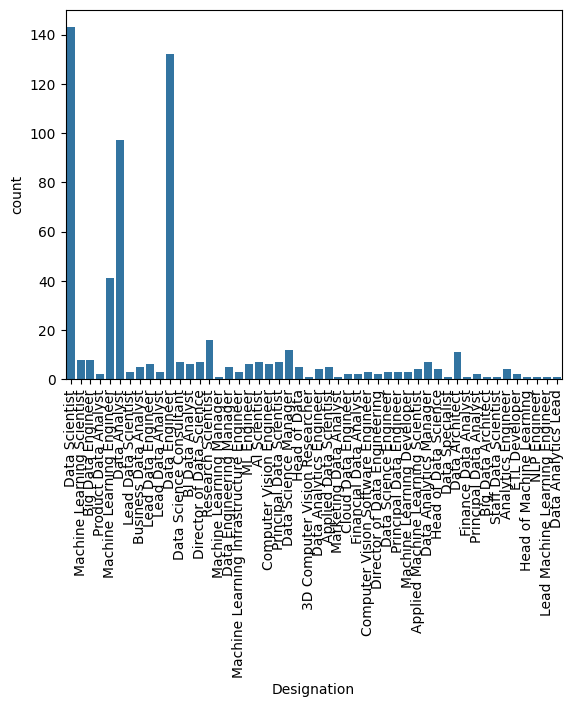

In [6]:
sns.countplot(data=salaries, x="Designation")
plt.xticks(rotation=90)
plt.show() # It's a kind of mess!! There are many job titles! Let's combine these many job titles into sub-groups, so we can reduce them

                    Designation      Job_Category
0                Data Scientist      Data Science
1    Machine Learning Scientist  Machine Learning
2             Big Data Engineer  Data Engineering
3          Product Data Analyst    Data Analytics
4     Machine Learning Engineer  Machine Learning
..                          ...               ...
602               Data Engineer  Data Engineering
603               Data Engineer  Data Engineering
604                Data Analyst    Data Analytics
605                Data Analyst    Data Analytics
606                AI Scientist  Machine Learning

[607 rows x 2 columns]


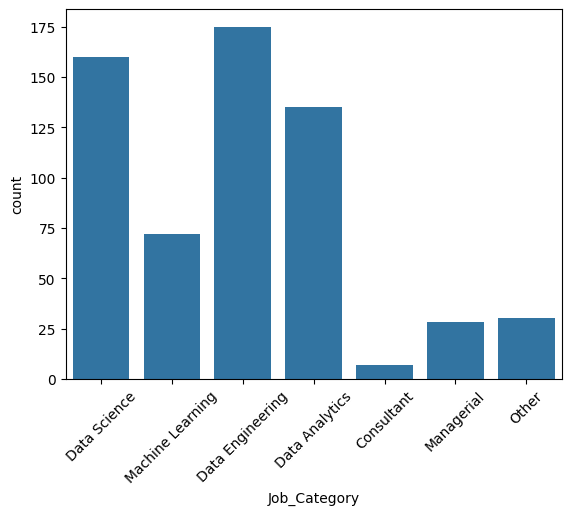

In [ ]:
# values in job_categories will become the values of a new column in our DataFrame
job_categories = ["Data Science", "Data Analytics", "Data Engineering",
				  "Machine Learning", "Managerial", "Consultant"]

# Let's create our filters
data_science = "Data Scientist|NLP" # We will look for Data Scientist or NLP for data science roles
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

conditions = [
	salaries["Designation"].str.contains(data_science, case=False), # case-insensitive
	salaries["Designation"].str.contains(data_analyst, case=False),
	salaries["Designation"].str.contains(data_engineer, case=False),
	salaries["Designation"].str.contains(ml_engineer, case=False),
	salaries["Designation"].str.contains(manager, case=False),
	salaries["Designation"].str.contains(consultant, case=False)
]

# let's create our new Job_Category column by using np.select(conditionList, choiceList, default) function.
# `default` → is the used element when all conditions evaluate to False
salaries["Job_Category"] = np.select(conditions, job_categories, default="Other")
print(salaries[["Designation", "Job_Category"]])
# imagine that the `conditionList` is a DataFrame, the `choiceList` is its columns, 
# and the row values (True/False) represents which choice (col name) should this observation be assigned to.
# The observation is assigned to the column name containing the 1st True value. 

sns.countplot(data=salaries, x="Job_Category")
plt.xticks(rotation=45)
plt.show()

# Converting Strings to Numbers

In [8]:
# `pandas.Series.str.replace("characters to remove(regex by default)", "characters to replace them with")`
# Let's assume that `salaries["Salary_USD"]` is non-numeric and contains numbers of this format: 20,453,008
# ↓↓
# if the character you wanna replace is at the beginning or end of the string only, it's more efficient to use → e.g., Series.str.strip('$')
# salaries["Salary_USD"] = salaries["Salary_USD"].str.replace(",", "") 
# salaries["Salary_USD"] = salaries["Salary_USD"].astype(float)